In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv(r'C:\Users\Prade\OneDrive\Desktop\YOGI STUDY\NLP\IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [40]:
def encode(n):
    if n=='positive':
        return 1
    else:
        return 0
df['sentiment'] = df['sentiment'].apply(encode)  
df


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [41]:
#seperating targets and features
target = df['sentiment']
Features = df['review']

In [ ]:
#The stratify=target parameter ensures your train and test sets have the same proportion of each class. This is especially important for imbalanced datasets!
#With random_state=32 and no stratification, the split happened to select:

#80% of data (40,000 rows) → All from the second half (indices 25000-49999) = All class 0
#20% of data (10,000 rows) → Also from the second half = All class 0
# this created a major data problem since the DATA had class 0 only and the model happenend to perform way too well..
#the model never saw class 1 during training..hence predicted 0 for each doc and coincidently the test set also had class 0 only,due to unfair distrtibution
# the unfair distrubution was due to the random_state=32 ..

In [42]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Features,target,test_size=0.2,random_state=42,stratify=target)
X_test.shape,X_train.shape

((10000,), (40000,))

In [43]:
#using parameters in tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
Z = vectorizer.get_feature_names_out()
Z

array(['00', '000', '00000000000', ..., 'żmijewski', 'יגאל', 'כרמון'],
      shape=(92692,), dtype=object)

In [44]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,Y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [45]:
Y_pred = model.predict(X_test)

In [46]:
#model score
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(Y_pred, Y_test)
print(score)
print(classification_report(Y_pred , Y_test ))

0.8652
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      5083
           1       0.85      0.88      0.86      4917

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [47]:
Y_pred = model.predict(X_test)
print("Unique predictions:", np.unique(Y_pred))
print("Unique in Y_test:", Y_test.unique())
print("\nConfusion Matrix:")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

Unique predictions: [0 1]
Unique in Y_test: [1 0]

Confusion Matrix:
[[4348  613]
 [ 735 4304]]


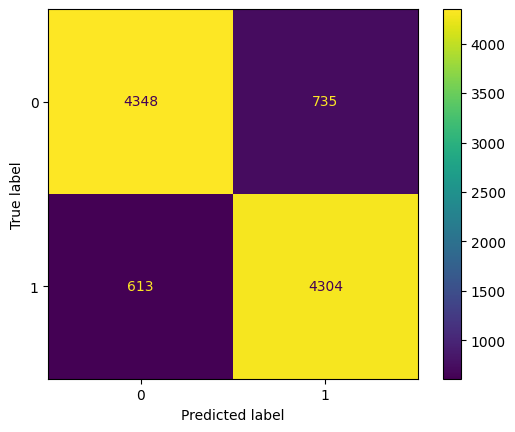

In [49]:
#displaying confusion matarix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(Y_pred, Y_test)
ConfusionMatrixDisplay(conf_matrix).plot()

In [48]:
# Check the full dataset
print("Original target distribution:")
print(target.value_counts())
print("\nPercentages:")
print(target.value_counts(normalize=True))

# Check train set
print("\nY_train distribution:")
print(Y_train.value_counts())

# Check test set
print("\nY_test distribution:")
print(Y_test.value_counts())

Original target distribution:
sentiment
1    25000
0    25000
Name: count, dtype: int64

Percentages:
sentiment
1    0.5
0    0.5
Name: proportion, dtype: float64

Y_train distribution:
sentiment
0    20039
1    19961
Name: count, dtype: int64

Y_test distribution:
sentiment
1    5039
0    4961
Name: count, dtype: int64
